variance =  0.21
expectation =  0.3


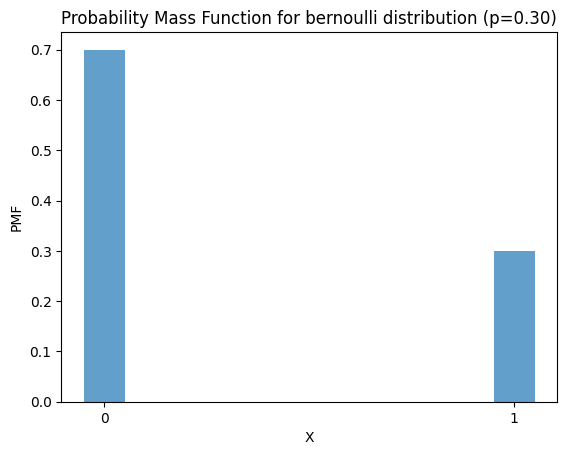

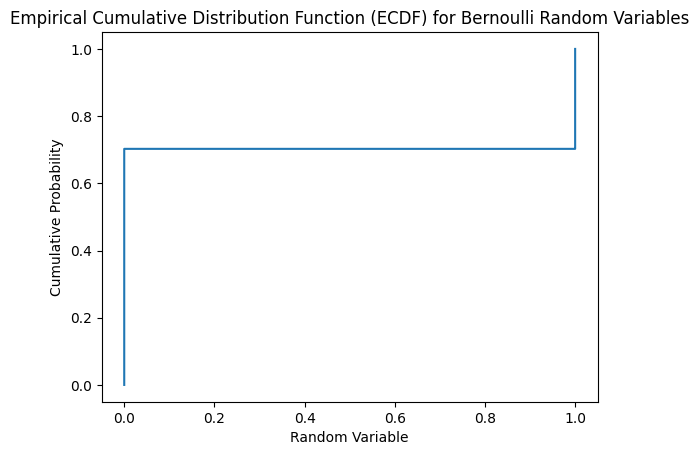

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Generate bernoulli random variables 
def generate_bernoulli(p, size):
    random_variables = []  # Initialize an empty list to store generated random variables
    for _ in range(size):  # Loop 'size' times to generate the specified number of random variables
        outcome = 1 if random.random() <= p else 0  # Generate a random outcome based on probability p
        random_variables.append(outcome)  # Add the outcome to the list
    return random_variables  # Return the list of generated random variables



# Caclulate PMF
def bernoulli_pmf(k, p):
    return p**k * (1-p)**(1-k)

#Calculate theoretical CDF
def bernoulli_cdf(x, p):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return 1 - p
    else:
        return 1

#Calculate Emprical CDF
def bernoulli_ecdf(data):
    # Count the number of data points
    n = len(data)
    
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the ECDF values
    cumulative_probabilities = []
    count = 0

    for value in sorted_data:
        count += 1
        cumulative_probabilities.append(count / n)

    return sorted_data, cumulative_probabilities

#Caclulate variance
def bernoulli_variance(p):
    return p * (1-p)

#Calculate Expectation (mean)
def bernoulli_expectation(p):
    return p

#Set probability of success parameter
p = 0.3

#Set size of generated random variables
size = 10000

#Store generated random variables
bernoulli_variables = generate_bernoulli(p, size)

#Get the unique values in generated bernoulli variables
unique_values, counts = np.unique(bernoulli_variables, return_counts=True)

#Iterate through the list and calculate PMF 
pmf_values = [bernoulli_pmf(k, p) for k in unique_values]

#iterate through the list and calculate CDF
sorted_data, y_ecdf = bernoulli_ecdf(bernoulli_variables)

#Store the variance
variance = bernoulli_variance(p)

#Store the expectation (mean)
expectation = bernoulli_expectation(p)

#Printing variance and exception
print ("variance = ", variance)
print ("expectation = ", expectation)

#Plotting PMF graph where unique values represent X-Axis and pmf_values represent Y-Axis
plt.bar(unique_values, pmf_values, align='center', alpha=0.7, width=0.1)
plt.xticks(unique_values)
plt.xlabel('X')
plt.ylabel('PMF')
plt.title(f'Probability Mass Function for bernoulli distribution (p={p:.2f})')
plt.show()

#Plotting CDF graph where sorted_data represent X-Axis and y_ecdf represent Y-Axis
plt.step(sorted_data, y_ecdf, where='post')
plt.title('Empirical Cumulative Distribution Function (ECDF) for Bernoulli Random Variables')
plt.xlabel('Random Variable')
plt.ylabel('Cumulative Probability')
plt.show()